## Algoritmo de Dijkstra

El algoritmo de Dijkstra nos sirve para determinar el camino más corto, dado un vértice inicial, hacia el resto de los vértices en una gráfica con pesos en las aristas. Así, para nuestro nodo inicial $A$, tendremos un vector $D$ que guardará al final del algoritmo las distancias desde $A$ hasta el resto de los nodos.
1. **Inicializar.** Inicializamos todas las distancias en $D$ con un valor infinito menos la de $A$, que se debe colocar en $0$.
2. **Marcar el nodo permanente.** Se toma $A$ como nodo permanente o definitivo.
3. **Idetificar los nodos vecinos disponibles.** Se recorren todos los nodos adyacentes de $A$, excepto los nodos marcados como permanentes y llamamos a los nodos no marcados $v_i$.
4. **Retiquetado.** Para el nodo actual, se calcula la distancia temporal desde ese nodo a sus vecinos. La distancia temporal del vecino $v_i$ es la distancia que actualmente tiene el nodo en el vector $D$ más la distancia desde dicho nodo $A$ (el nodo permanente) hasta el nodo $v_i$. Si la distancia tentativa es menor que la distancia almacenada en el vector, entonces se actualiza el vector con esta distancia tentativa.
5. **Actualizar nodo permanente.** Se toma como próximo nodo permanente el de menor valor en $D$ y se regresa al paso 3, mientras existan nodos no marcados.

**Observaciones.**
- **$MD.$** Una matriz de costos de las aristas del grafo, donde en $MD[u,v]$ se almacena el costo de la arista entre $u$ y $v$.
- **$ED.$** Conjunto que contendrá los vértices para los cuales ya se tiene determinado el camino mínimo.
- $D.$ Un arreglo unidimensional tal que $D[v]$ es el costo del camino mínimo del vértice origen al vértice $v$.
- $O.$ Un arreglo unidimensional tal que $P[v]$ es el vértice predecesor de $v$ en el camino mínimo que se tiene construido.

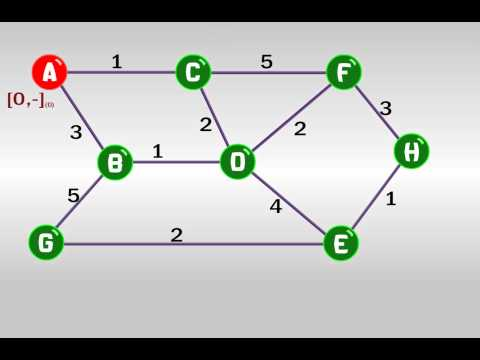

In [33]:
from IPython.display import YouTubeVideo
video = YouTubeVideo("LLx0QVMZVkk",height = 400,width = 550)
display(video)

### Ejercicio 1
Programa una función que reciba la matriz de pesos de una gráfica y el nodo inicial y que aplique el algoritmo de Dijkstra. Tu función debe regresar una lista con las distancias de las rutas y el origen de la arista con la que terminó la ruta.

Comandos útiles de numpy:
- ```np.shape(Matriz)```
- ```np.inf```
- ```np.zeros(n)```
- ```np.ones(n)```
- ```np.where(condicion)```
- ```np.min(lista)```

Comandos útiles de python:
- ```dict.fromkeys(lista)```

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def Dijkstra(MD,e):
    MD=np.array(MD)
    n,n = MD.shape

    # Estados que estoy visitando y son modificables
    E = []

    # Estados Definitivos
    ED = []

    # Origen de la arista
    O = np.inf*np.ones(n)
    #[inf inf inf inf inf inf inf inf]
    #En un principio es como decir, no vengo de ningún nodo

    # Distancia de la ruta
    D = np.inf*np.ones(n)
    #[inf inf inf inf inf inf inf inf]
    #Poner la distacia a cualquier nodo es infinito

    #PASO 1
    # Inicialización
    O[e] = e
    D[e] = 0
    E.append(e)

    # Mientras que aún no tengas la ruta mas corta a todos los puntos
    while len(ED) < n:

        #PASO 2
        # Agregar e como definitivo
        ED.append(e)

        #PASO 3
        # Busca a los vecinos de tu nodo e
        uindex = np.where(MD[e,]!=0)[0]

        #PASO 4
        # Si no esta en tus nodos definitivos y es vecino ent
        # checa si su distancia puede ser mejorada.
        for i in uindex:
            if i not in ED:
                E.append(i)
                if D[e] + MD[e,i] < D[i]:
                    D[i] = D[e] + MD[e,i]
                    O[i] = e

        # Quitarlo de la otra lista
        E.remove(e)

        # Quitar repetidos
        E = list(dict.fromkeys(E))
        #ED = list(dict.fromkeys(ED))

        #Pasa 5
        # Ya tenemos todos?
        if len(ED) == n:
            break

        # Buscamos al siguiente nodo e con la mínima distancia hasta ahora.
        m = np.min(D[E])
        index = np.where(D==m)[0]
        for i in index:
            if i in E:
                e = i
    return D,O

In [53]:


# Definir la matriz de adyacencia de ejemplo
MD = [[0, 3, 0, 0, 0],
      [0, 0, 2, 0, 0],
      [0, 0, 0, 1, 0],
      [0, 0, 0, 0, 4],
      [0, 0, 0, 0, 0]]

# Nodo de origen
e = 0

# Ejecutar el algoritmo de Dijkstra
D, O = Dijkstra(MD, e)

# Mostrar los resultados
print("Distancias más cortas:", D)
print("Nodos de origen:", O)

Distancias más cortas: [ 0.  3.  5.  6. 10.]
Nodos de origen: [0. 0. 1. 2. 3.]


### Ejercicio 2
Ahora, usando las listas generadas por tu función del algoritmo de Dijkstra, programa una función que encuentre el camino óptimo entre dos vértices.

In [58]:
def Camino(Matrix,o,p):
    D, O = Dijkstra(Matrix, o) # Aplicamos Dijkstra para obtener D, O
    aux_cam = p
    camino = [p]
    while aux_cam != 0:
        aux_cam = int(O[aux_cam])
        camino.append(int(aux_cam))
    return camino[::-1]

In [59]:
Camino(MD,0,3)

[0, 1, 2, 3]

### Ejercicio 3
Prueba tus funciones con las siguientes matrices de pesos, empezando siempre en el nodo 0.</br>
También usa la libreria ``networkx`` para crear las graficas.</br>
**Nota :** Donde encuentres un cero quiere decir que no existe una arista entre dichos vertices </br>
**Gráfica 1**</br>
La matriz de pesos está dada por:

\begin{bmatrix}
2 & 4 & 3 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 7 & 4 & 6 & 0 & 0 & 0\\
0 & 0 & 0 & 3 & 2 & 4 & 0 & 0 & 0\\
0 & 0 & 0 & 4 & 1 & 5 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 4 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 6 & 3 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 3 & 3 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 3\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 4
\end{bmatrix}

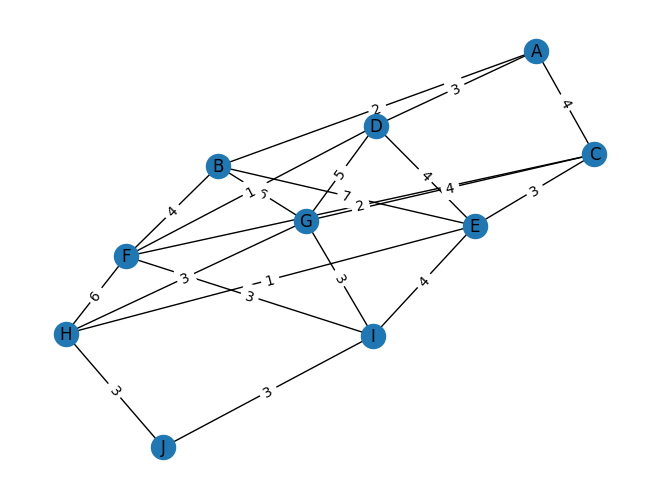

In [37]:
import networkx as nx
aristas = {'A':[['B','C','D'],[2,4,3]],
           'B':[['E','F','G'],[7,4,6]],
           'C':[['E','F','G'],[3,2,4]],
           'D':[['E','F','G'],[4,1,5]],
           'E':[['H','I'],[1,4]],
           'F':[['H','I'],[6,3]],
           'G':[['H','I'],[3,3]],
           'H':[['J'],[3]],
           'I':[['J'],[3]]}
G = nx.Graph()
V = list(aristas.keys())
for i in range(len(V)):
    for j in range(len(aristas[V[i]][0])):
        G.add_edge(V[i],aristas[V[i]][0][j],weight= aristas[V[i]][1][j])
# Creamos Posiciones Para Los Nodos
pos = nx.spring_layout(G)
# Dibujamos Los Nodos De Acuerdo a La Posición
nx.draw(G, pos, with_labels=True)
# Creamos Las Etiquetas Para Las Aristas
labels = {(u,v): d['weight'] for (u,v,d) in G.edges(data=True)}
# Dibujamos Las Etiquetas de las Aristas de Acuerdo a La Posición
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
# Para Guardar la Grafica Se Usa Este Comando
#plt.savefig("Grafica1.png")
plt.show()

In [62]:
MAX = np.array([[2,4,3,0,0,0,0,0,0],[0,0,0,7,4,6,0,0,0],[0,0,0,3,2,4,0,0,0],[0,0,0,4,1,5,0,0,0],[0,0,0,0,0,0,1,4,0],[0,0,0,0,0,0,6,3,0],[0,0,0,0,0,0,3,3,0],[0,0,0,0,0,0,0,0,3],[0,0,0,0,0,0,0,0,4]])
print(f'Camino óptimo de 0 a 5: {Camino(MAX,0,5)}')
print(f'Camino óptimo de 0 a 2: {Camino(MAX,0,5)}')
print(f'Camino óptimo de 0 a 7: {Camino(MAX,0,7)}')

Camino óptimo de 0 a 5: [0, 2, 5]
Camino óptimo de 0 a 2: [0, 2, 5]
Camino óptimo de 0 a 7: [0, 2, 4, 7]


**Gráfica 2**</br>
La matriz de pesos está dada por:

\begin{bmatrix}
0 & 3 & 0 & 2 & 0 & 0 & 0 & 0\\
3 & 0 & 1 & 0 & 4 & 0 & 0 & 0\\
0 & 1 & 0 & 3 & 0 & 2 & 2 & 0\\
2 & 0 & 3 & 0 & 0 & 0 & 4 & 0\\
0 & 4 & 0 & 0 & 0 & 0 & 0 & 6\\
0 & 0 & 2 & 0 & 0 & 0 & 3 & 4\\
0 & 0 & 2 & 4 & 0 & 3 & 0 & 5\\
0 & 0 & 0 & 0 & 6 & 4 & 5 & 0
\end{bmatrix}

In [65]:
matriz_2 = np.array([[0,3,0,2,0,0,0,0],[3,0,1,0,4,0,0,0],[0,1,0,3,0,2,2,0],[2,0,3,0,0,0,4,0],[0,4,0,0,0,0,0,6],[0,0,2,0,0,0,3,4],[0,0,2,4,0,3,0,5],[0,0,0,0,6,4,5,0]])
print(f'Camino óptimo de 0 a 4: {Camino(matriz_2,0,4)}')
print(f'Camino óptimo de 0 a 2: {Camino(matriz_2,0,2)}')
print(f'Camino óptimo de 1 a 7: {Camino(matriz_2,0,7)}')

Camino óptimo de 0 a 4: [0, 1, 4]
Camino óptimo de 0 a 2: [0, 1, 2]
Camino óptimo de 1 a 7: [0, 1, 2, 5, 7]


**Gráfica 3**</br>
Ahora tenemos una gráfica dirigida.</br>
La matriz de pesos está dada por:
\begin{bmatrix}
0 & 9 & 0 & 6\\
0 & 0 & 0 & 1\\
0 & 3 & 0 & 0\\
0 & 0 & 2 & 0
\end{bmatrix}

In [49]:
M3 = np.zeros((4,4))
M3[0,1] = 9
M3[3,2] = 2
M3[0,3] = 6
M3[1,3] = 1
M3[2,1] = 3
D3,O3 = Dijkstra(M3,0)

In [67]:
D3,O3 = Dijkstra(M3,0)
Camino(M3,0,2)

[0, 3, 2]

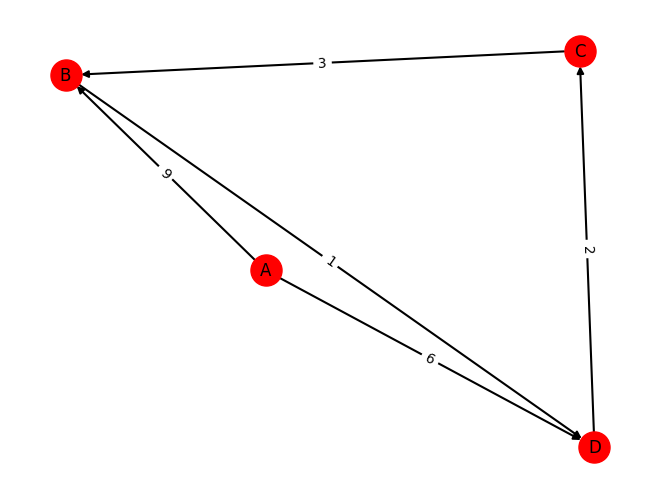

In [68]:
G = nx.DiGraph()
G.add_edge('A','B',weight= 9)
G.add_edge('A','D',weight= 6)
G.add_edge('B','D',weight= 1)
G.add_edge('C','B',weight= 3)
G.add_edge('D','C',weight= 2)
# Creamos Posiciones Para Los Nodos
pos = nx.spring_layout(G)
# Definimos el Estilo de Nuestra Gráfica
options = {'node_color': 'red',
           'edge_color': 'black',
           'node_size': 500,
           'width': 1.5,
           'arrowstyle': '-|>',
           'arrowsize': 10,}
# Dibujamos Los Nodos De Acuerdo a La Posición
nx.draw(G, pos, with_labels=True, **options)
# Creamos Las Etiquetas Para Las Aristas
labels = {(u,v): d['weight'] for (u,v,d) in G.edges(data=True)}
# Dibujamos Las Etiquetas de las Aristas de Acuerdo a La Posición
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
# Para Guardar la Grafica Se Usa Este Comando
#plt.savefig("Grafica2.png")
plt.show()

**Gráfica 4**</br>
Otra una gráfica dirigida </br>
La matriz de pesos está dada por:
\begin{bmatrix}
0 & 4 & 8 & 16\\
0 & 0 & 5 & 11\\
0 & 0 & 0 & 6\\
0 & 0 & 0 & 0\\
\end{bmatrix}

In [70]:
matriz_4 = np.array([[0,4,8,16],[0,0,5,11],[0,0,0,6],[0,0,0,0]])
print(f'Camino óptimo de 0 a 2: {Camino(matriz_4,0,3)}')

Camino óptimo de 0 a 2: [0, 2, 3]


## El problema de la mochila

Buscamos maximizar el beneficio de los artículos en la mochila con ciertas restricciones.


|Artículo|Peso|Beneficio|
|:------:|:--:|:-------:|
|1|2kg|65|
|2|3kg|80|
|3|1kg|30|

Teniendo como restircción de peso 5 kg

Buscamos definir la solución de manera recursiva.
### Etapa 1
La primera etapa consistira en maximizar el beneficio con respecto al peso del artículo 1.
$$
f_1(y_1) = \begin{cases}
       0   &\quad\text{si }y_1\in \{0,1\}\\
       65  &\quad\text{si }y_1\in \{2,3\}\\
       130 &\quad\text{si }y_1\in \{4,5\}\\
     \end{cases}
$$

In [72]:
import math

def f1(y,peso,beneficio,pesoMax):
    for i in range(pesoMax+1):
        if y == i:
            return [beneficio[0]*math.floor(y/peso[0]) , math.floor(y/peso[0])]

for i in range(6):
    print('f1('+str(i)+')='+str(f1(i,[2],[65],5)[0])+ "\t art1 = "+ str(f1(i,[2],[65],5)[1]))

f1(0)=0	 art1 = 0
f1(1)=0	 art1 = 0
f1(2)=65	 art1 = 1
f1(3)=65	 art1 = 1
f1(4)=130	 art1 = 2
f1(5)=130	 art1 = 2


### Etapa 2
$$
f_2(y_2)=max_{k_2\leq \left\lfloor\frac{y_2}{w_2}\right\rfloor} \left\{b_2\cdot k_2 + f_1(y_2-w_2k_2)\right\}
$$

$$
f_2(y_2)= max \left\{b_2\cdot k_2 + f_1(y_2-w_2k_2):k_2\leq \left\lfloor\frac{y_2}{w_2}\right\rfloor\right\}
$$

- $y_2$ = peso en artículos al terminar la etapa 2 (tipo1, tipo2)
- $k_2$ = cantidad de artículos de tipo 2
- $w_2$ = peso por unidad de artículos de tipo 2

In [73]:
def f2(y,peso,beneficio):
    est = [(0,0,0)]
    pesoMax = y
    for i,j in zip(range(pesoMax+1),range(pesoMax,-1,-1)):
        if i != j and i+j == y:
            est.append((f1(j,[2],[65],5)[0]+f1(i,[3],[80],y)[0],int(i/3),int(j/2)))
    return max(est) if max(est)[0] != 0 else (0,0,0)

for i in range(6):
    print('f2('+str(i)+')='+str(f2(i,[3],[80])[0])+ "\t art2 = "+ str(f2(i,[3],[80])[1])+"\t art1 = "+ str(f2(i,[3],[80])[2]))

f2(0)=0	 art2 = 0	 art1 = 0
f2(1)=0	 art2 = 0	 art1 = 0
f2(2)=65	 art2 = 0	 art1 = 1
f2(3)=80	 art2 = 1	 art1 = 0
f2(4)=130	 art2 = 0	 art1 = 2
f2(5)=145	 art2 = 1	 art1 = 1


### Etapa 3
$$
f_3(y_3)=max_{k_3\leq \left\lfloor\frac{y_3}{w_3}\right\rfloor} \left\{b_3\cdot k_3 + f_2(y_3-w_3k_3)\right\}
$$

In [74]:
def f3(y,peso,beneficio):
    pesoMax = y
    est = [(0,0,0,0)]
    for i,j in zip(range(pesoMax+1),range(pesoMax,-1,-1)):
        if i != j and i+j == y:
            est.append((f2(j,[3],[80])[0] + f1(i,[1],[30],y)[0], int(i),f2(j,[3],[80])[1], f2(j,[3],[80])[2]))
    return max(est)
print('f3('+str(5)+')='+str(f3(5,[1],[30])[0])+ "\t art3 = "+ str(f3(5,[1],[30])[1])+ "\t art2 = "+ str(f3(5,[1],[30])[2])
     + "\t art1 = "+ str(f3(5,[1],[30])[3]))

f3(5)=160	 art3 = 1	 art2 = 0	 art1 = 2
